# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [24]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 606


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [25]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city_weather =requests.get(query_url + city).json()

from pprint import pprint
# Print the json
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -33.918, 'lon': 25.5701},
 'dt': 1675829515,
 'id': 964420,
 'main': {'feels_like': 20.04,
          'humidity': 92,
          'pressure': 1019,
          'temp': 19.62,
          'temp_max': 19.62,
          'temp_min': 19.5},
 'name': 'Port Elizabeth',
 'sys': {'country': 'ZA',
         'id': 2072678,
         'sunrise': 1675827951,
         'sunset': 1675876679,
         'type': 2},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 280, 'gust': 3.13, 'speed': 1.79}}


In [28]:
# Set the API base URL
#url = "http://api.openweathermap.org/data/2.5/weather?"
#units = "metric"

# Build partial query URL
#query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    #city_url = # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather =requests.get(query_url + city).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date =city_weather["dt"]
        #city_name =city_weather["name"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | perth
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | shahreza
Processing Record 7 of Set 1 | vila velha
Processing Record 8 of Set 1 | iskateley
Processing Record 9 of Set 1 | arua
Processing Record 10 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 11 of Set 1 | omboue
Processing Record 12 of Set 1 | palu
Processing Record 13 of Set 1 | baijiantan
Processing Record 14 of Set 1 | arlit
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | maniitsoq
Processing Record 18 of Set 1 | narsaq
Processing Record 19 of Set 1 | norman wells
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | yellowknife
Processing Record 22 of Set 1 | elko
Processing Record 23 of Set

Processing Record 38 of Set 4 | cockburn harbour
City not found. Skipping...
Processing Record 39 of Set 4 | tiksi
Processing Record 40 of Set 4 | sarny
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | jiutai
Processing Record 43 of Set 4 | asau
Processing Record 44 of Set 4 | naliya
Processing Record 45 of Set 4 | bengkulu
Processing Record 46 of Set 4 | oksfjord
Processing Record 47 of Set 4 | ribeira grande
Processing Record 48 of Set 4 | sataua
City not found. Skipping...
Processing Record 49 of Set 4 | la ronge
Processing Record 0 of Set 5 | marzuq
Processing Record 1 of Set 5 | lompoc
Processing Record 2 of Set 5 | terenos
Processing Record 3 of Set 5 | aswan
Processing Record 4 of Set 5 | bam
Processing Record 5 of Set 5 | toliary
City not found. Skipping...
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | mo i rana
Processing Record 8 of Set 5 | broome
Processing Record 9 of Set 5 | langxiang
Processing Record 10 of Set 5 | bandar-e to

Processing Record 27 of Set 8 | balimo
City not found. Skipping...
Processing Record 28 of Set 8 | sangmelima
Processing Record 29 of Set 8 | yinchuan
Processing Record 30 of Set 8 | montrose
Processing Record 31 of Set 8 | beira
Processing Record 32 of Set 8 | sines
Processing Record 33 of Set 8 | ixtapa
Processing Record 34 of Set 8 | divnogorsk
Processing Record 35 of Set 8 | kasempa
Processing Record 36 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 37 of Set 8 | klaksvik
Processing Record 38 of Set 8 | mount isa
Processing Record 39 of Set 8 | zhanaozen
Processing Record 40 of Set 8 | genhe
Processing Record 41 of Set 8 | inta
Processing Record 42 of Set 8 | xinpu
Processing Record 43 of Set 8 | buala
Processing Record 44 of Set 8 | mnogovershinnyy
Processing Record 45 of Set 8 | jalu
Processing Record 46 of Set 8 | wanning
Processing Record 47 of Set 8 | tasiilaq
Processing Record 48 of Set 8 | verkhoyansk
Processing Record 49 of Set 8 | mandurah
Processing Reco

Processing Record 17 of Set 12 | gueret
Processing Record 18 of Set 12 | evensk
Processing Record 19 of Set 12 | malia
Processing Record 20 of Set 12 | feijo
Processing Record 21 of Set 12 | katuli
Processing Record 22 of Set 12 | molochnoye
Processing Record 23 of Set 12 | kashin
Processing Record 24 of Set 12 | shumskiy
Processing Record 25 of Set 12 | karratha
Processing Record 26 of Set 12 | praia
Processing Record 27 of Set 12 | puerto colombia
Processing Record 28 of Set 12 | ndele
Processing Record 29 of Set 12 | narbonne
Processing Record 30 of Set 12 | tiarei
Processing Record 31 of Set 12 | javanrud
Processing Record 32 of Set 12 | meyungs
City not found. Skipping...
Processing Record 33 of Set 12 | batote
Processing Record 34 of Set 12 | nelson bay
Processing Record 35 of Set 12 | ariquemes
Processing Record 36 of Set 12 | nemuro
Processing Record 37 of Set 12 | khislavichi
Processing Record 38 of Set 12 | granada
Processing Record 39 of Set 12 | teya
Processing Record 40 of

In [47]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          552
Lat           552
Lng           552
Max Temp      552
Humidity      552
Cloudiness    552
Wind Speed    552
Country       552
Date          552
dtype: int64

In [48]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,12.21,67,48,12.35,NZ,1675829655
1,perth,-31.9333,115.8333,31.12,42,0,3.60,AU,1675829700
2,port alfred,-33.5906,26.8910,20.10,90,100,1.79,ZA,1675829600
3,vaini,-21.2000,-175.2000,25.09,100,75,2.57,TO,1675829589
4,butaritari,3.0707,172.7902,27.41,80,100,9.67,KI,1675829578


In [50]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [51]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,12.21,67,48,12.35,NZ,1675829655
1,perth,-31.9333,115.8333,31.12,42,0,3.60,AU,1675829700
2,port alfred,-33.5906,26.8910,20.10,90,100,1.79,ZA,1675829600
3,vaini,-21.2000,-175.2000,25.09,100,75,2.57,TO,1675829589
4,butaritari,3.0707,172.7902,27.41,80,100,9.67,KI,1675829578


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

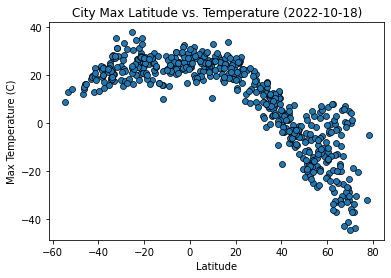

In [64]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", linewidths=0.7, marker="o", alpha=1)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

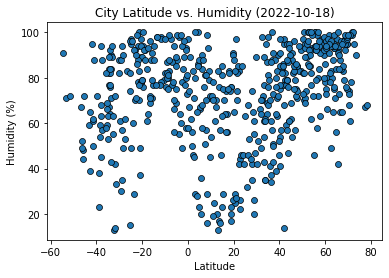

In [67]:
# Build the scatter plots for latitude vs. humidity
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", linewidths=0.7, marker="o", alpha=1)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

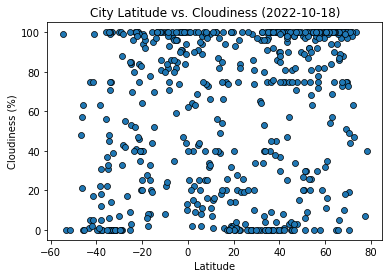

In [68]:
# Build the scatter plots for latitude vs. cloudiness
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", linewidths=0.7, marker="o", alpha=1)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

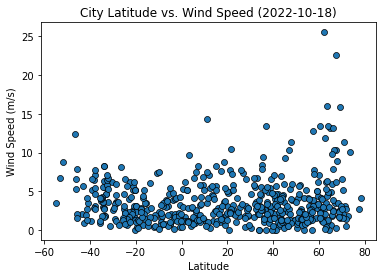

In [69]:
# Build the scatter plots for latitude vs. wind speed
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", linewidths=0.7, marker="o", alpha=1)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [158]:
# Define a function to create Linear Regression plots
def linregress(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

In [159]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,butaritari,3.0707,172.7902,27.41,80,100,9.67,KI,1675829578
5,shahreza,32.0339,51.8794,3.08,49,0,5.49,IR,1675829679
7,iskateley,67.6803,53.1512,0.58,83,88,10.31,RU,1675829698
8,arua,3.0201,30.9111,18.85,29,9,1.18,UG,1675829973
11,baijiantan,45.6333,85.1833,-9.10,91,81,0.68,CN,1675830150


In [103]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,12.21,67,48,12.35,NZ,1675829655
1,perth,-31.9333,115.8333,31.12,42,0,3.60,AU,1675829700
2,port alfred,-33.5906,26.8910,20.10,90,100,1.79,ZA,1675829600
3,vaini,-21.2000,-175.2000,25.09,100,75,2.57,TO,1675829589
6,vila velha,-20.3297,-40.2925,25.53,89,40,0.00,BR,1675829918


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7608251762074745


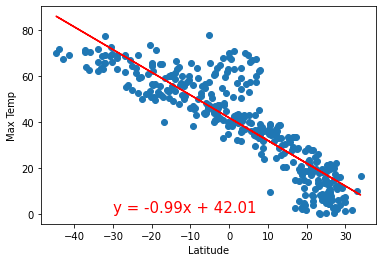

In [125]:
# Linear regression on Northern Hemisphere
from scipy import stats

x_values = northern_hemi_df["Max Temp"]
y_values = northern_hemi_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,1),fontsize=15,color="red")

# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.14506105864827668


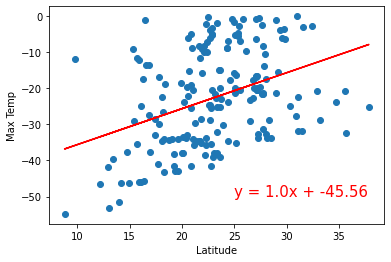

In [133]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Max Temp"]
y_values = southern_hemi_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(25,-50),fontsize=15,color="red")
# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Max Temp")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The trend in the Northern Hemisphere is decreasing and is very closely distributed along the R-value line; The higher the latitude, the lower the maximum temperature. The trend in the Southern Hemisphere is upward, with a very scattered distribution along the R line; The higher the latitude, the higher the maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.21571043366952836


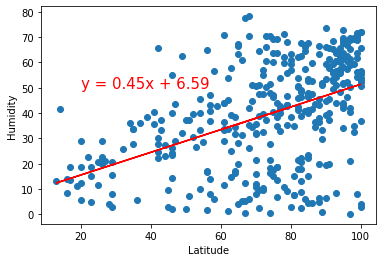

In [138]:
# Northern Hemisphere
x_values = northern_hemi_df["Humidity"]
y_values = northern_hemi_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,50),fontsize=15,color="red")
# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.11656692009734644


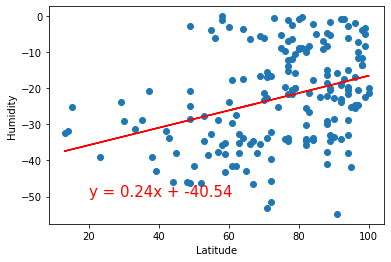

In [143]:
# Southern Hemisphere
x_values = southern_hemi_df["Humidity"]
y_values = southern_hemi_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,-50),fontsize=15,color="red")
# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Humidity")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The trend in the Northern Hemisphere is increasing; The higher the latitude, the higher the humidity. The trend in the Southern Hemisphere is upward, with a very scattered distribution along the R line; The higher the latitude, the higher the humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08381940121422084


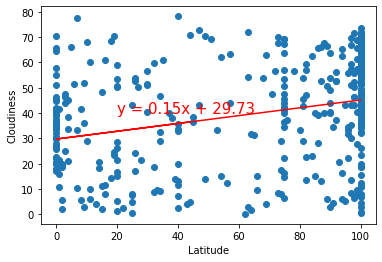

In [146]:
# Northern Hemisphere
x_values = northern_hemi_df["Cloudiness"]
y_values = northern_hemi_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.2023117162301272


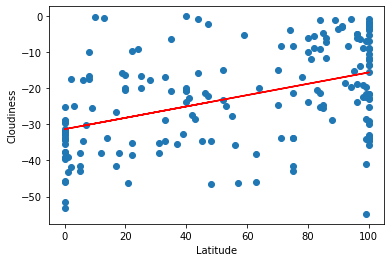

In [147]:
# Southern Hemisphere
x_values = southern_hemi_df["Cloudiness"]
y_values = southern_hemi_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Cloudiness")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The trend in the Northern Hemisphere is increasing, with a very scattered distribution along the R line; The higher the latitude, the higher the Cloudiness. The trend in the Southern Hemisphere is upward, with a very scattered distribution along the R line; The higher the latitude, the higher the Cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.014608401698720165


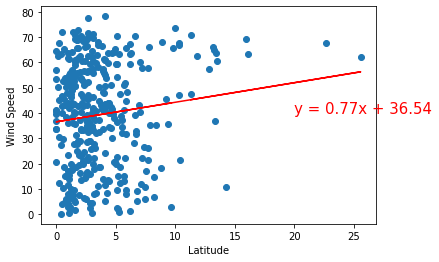

In [148]:
# Northern Hemisphere
x_values = northern_hemi_df["Wind Speed"]
y_values = northern_hemi_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")
# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

The r-value is: 0.1443286360987644


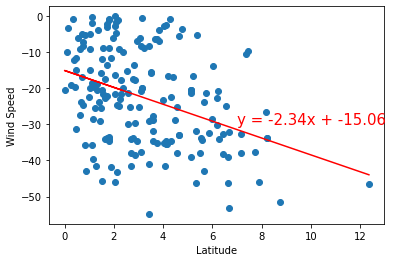

In [157]:
# Southern Hemisphere
x_values = southern_hemi_df["Wind Speed"]
y_values = southern_hemi_df["Lat"]

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(7,-30),fontsize=15,color="red")
# Set xlabel
plt.xlabel("Latitude")

# Set ylabel
plt.ylabel("Wind Speed")

# Print r value
print(f"The r-value is: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** The trend in the Northern Hemisphere is increasing, but most of the data are concentrated in the lower latitudes; The higher the latitude, the higher the wind speed. The trend in the Southern Hemisphere is decreasing, with a very scattered distribution along the R line; The higher the latitude, The lower the wind speed; but also, most of the data are concentrated in the lower latitudes.